In [1]:
from alpaca_trader import Alpaca_Trader as alp_trader
from config import *
from TradingEnv import TradingEnv as trading_env

trader = alp_trader(key=ALPACA_PAPER_KEY, secret_key=ALPACA_PAPER_SECRET_KEY)


In [2]:
df = trader.Historical_Add_Technicals_DF(asset="BTC/USD", days_delta = 10000)
df

start:  1995-07-27 00:00:00


,Open,High,Low,Close,Volume,Trade_Count,EMA,RSI,pivot,s1,s2,s3,s4,r1,r2,r3,r4,MACD,SIGNAL
0,7314.00,7314.00,7314.00,7314.00,0.000100,1.0,7314.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,7101.50,7101.50,7101.50,7101.50,0.000100,1.0,7207.218750,0.000000,7314.000000,7314.000000,7314.000000,7314.000000,7314.000000,7314.000000,7314.000000,7314.000000,7314.000000,-4.767628,-2.648682
2,7100.00,7100.00,7100.00,7100.00,0.000100,1.0,7171.121178,0.000000,7101.500000,7101.500000,7101.500000,7101.500000,7101.500000,7101.500000,7101.500000,7101.500000,7101.500000,-6.121420,-4.071935
3,7118.50,7118.50,7118.50,7118.50,0.000100,1.0,7157.767900,9.107921,7100.000000,7100.000000,7100.000000,7100.000000,7100.000000,7100.000000,7100.000000,7100.000000,7100.000000,-5.919194,-4.697701
4,7748.50,7748.50,7748.50,7748.50,0.000300,1.0,7278.289003,79.058101,7118.500000,7118.500000,7118.500000,7118.500000,7118.500000,7118.500000,7118.500000,7118.500000,7118.500000,19.384455,2.466196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635606,17151.61,17156.00,17149.02,17153.61,0.698312,20.0,17161.113770,48.272326,17150.396667,17147.707387,17146.045947,17143.356667,17140.667387,17153.085947,17154.747387,17157.436667,17160.125947,-1.870829,-1.031555
635607,17153.27,17155.16,17151.38,17152.89,0.282758,23.0,17161.031941,47.648054,17152.876667,17150.210307,17148.563027,17145.896667,17143.230307,17155.543027,17157.190307,17159.856667,17162.523027,-1.783571,-1.181958
635608,17153.59,17156.15,17153.59,17155.61,2.842751,50.0,17160.977991,50.264797,17153.143333,17151.699373,17150.807293,17149.363333,17147.919373,17154.587293,17155.479373,17156.923333,17158.367293,-1.477901,-1.241147
635609,17152.60,17155.48,17150.46,17153.78,0.749170,44.0,17160.906370,48.508051,17155.116667,17154.138747,17153.534587,17152.556667,17151.578747,17156.094587,17156.698747,17157.676667,17158.654587,-1.367556,-1.266429


In [3]:
env = trading_env(df)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


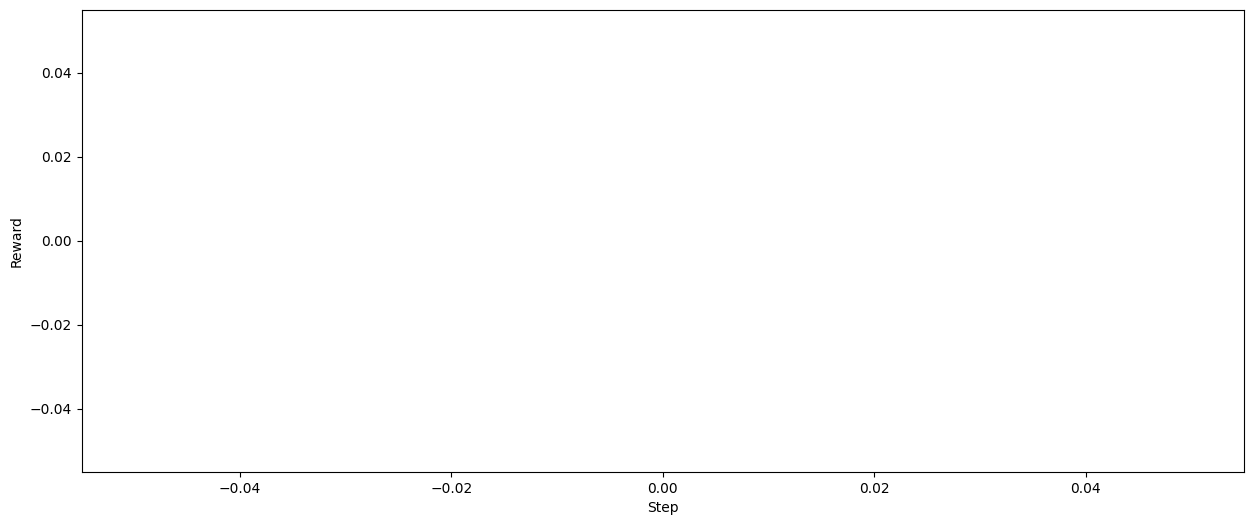

------------------------------------
| time/                 |          |
|    fps                | 188      |
|    iterations         | 10       |
|    time_elapsed       | 0        |
|    total_timesteps    | 50       |
| train/                |          |
|    entropy_loss       | -1.08    |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 9        |
|    policy_loss        | 12.6     |
|    value_loss         | 205      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 283      |
|    iterations         | 20       |
|    time_elapsed       | 0        |
|    total_timesteps    | 100      |
| train/                |          |
|    entropy_loss       | -1.05    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 19       |
|    policy_loss        | 108      |
|    value_loss         | 1.66e+04 |
-

In [4]:
from stable_baselines3.common.vec_env import DummyVecEnv
# from stable_baselines3.common.policies import MlpLnLstmPolicy
from stable_baselines3 import A2C

# Wrap the TradingEnv in a DummyVecEnv to support multiple parallel environments
vec_env = DummyVecEnv([lambda: env])

# Define the A2C model
model = A2C('MlpPolicy', env, verbose=1, device="cuda") 

# Train the model
model.learn(total_timesteps=1000, log_interval=10)

# Save the trained model
# model.save("a2c_model")

In [5]:
import time
from IPython.display import clear_output

def wait_and_trade(trader, model, env):
    clear_output()

   # Get the current time
    current_time = time.time()

    # Calculate the time until the next minute
    wait_time = 60 - (current_time % 60)

    # Sleep until the next minute
    time.sleep(wait_time)

    # Update the dataframe with the latest data
    df = trader.Historical_Add_Technicals_DF(asset="BTC/USD", days_delta =0)

    # Get the last row of data
    last_row = df.iloc[-1]

    # Convert the row to a NumPy array
    latest_obs = last_row.to_numpy()

    # Get the action from the model
    action, _states = model.predict(latest_obs)

    # Print the action (buy, sell, or hold)
    print(env.action_dict[action.item()])

    try:
        # Make the trade
        if action == 0:
            # Buy
            trader.buy(asset="BTC/USD")
        elif action == 1:
            # Sell
            trader.sell(asset="BTC/USD")
        else:
            # Hold
            pass
    except Exception as e:
        print(e)

In [6]:
while True:
    try:
        wait_and_trade(trader, model, env)
    except Exception as e:
        print(e)

start:  Today


ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

In [ ]:
# update df with latest data
df = trader.Historical_Add_Technicals_DF(asset="BTC/USD", days_delta =0)

# Get last row of data
last_row = df.iloc[-1]

latest_obs = last_row.to_numpy()

# Get the action from the model
action, _states = model.predict(latest_obs)

print(action, env.action_dict[action.item()])

# print buy sell or hold from action
# print(env.action_dict[action])

2 Hold
